# Collect Data from csv File (pour le test) (ca sera remplacee apres par les API)

In [11]:
import csv

def extract_data_from_csv():
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Example usage:
amplitudes, frequencies, phases = extract_data_from_csv()

print("Amplitudes:", amplitudes)
print("Frequencies:", frequencies)
print("Phases:", phases)


Enter the path to your CSV file: hc.csv
Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


# ca s'execute pas , et on sait pas pq!! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

class ModeleMaree:
    def __init__(self, amplitudes, frequences, dephasages):
        self.amplitudes = amplitudes
        self.frequences = frequences
        self.dephasages = dephasages

    def modele_marée(self, t, Z, *parametres):
        resultat = Z
        for i in range(0, len(parametres), 3):
            Ac = parametres[i]
            Wc = 2 * np.pi * (parametres[i + 1]) / 360
            Lc = parametres[i + 2]
            resultat += Ac * np.cos(Wc * (t / 3600) - Lc)
        return resultat

    def fit(self, temps, hauteur_eau):
        Z = 0.0
        parametres_initiaux = [Z] + [c for composante in zip(self.amplitudes, self.frequences, self.dephasages) for c in composante]
        parametres_optimaux, _ = curve_fit(self.modele_marée, temps, hauteur_eau, p0=parametres_initiaux, maxfev=1000000)
        return parametres_optimaux

    def predict(self, temps_prediction, parametres_optimaux):
        return self.modele_marée(temps_prediction, *parametres_optimaux)

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
temps = np.arange(0, 10, 0.1)  # Temps de 0 à 10 secondes avec un pas de 0.1 seconde
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

# Constituants de marée
amplitudes = [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
frequences = [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331,]
dephasages = [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]

# Création de l'objet modèle de marée
modele = ModeleMaree(amplitudes, frequences, dephasages)

# Estimation des paramètres
parametres_optimaux = modele.fit(temps, hauteur_eau)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 24, 0.1)

# Faire la prédiction
hauteur_eau_predite = modele.predict(temps_prediction, parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les 10 premiers constituants de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


KeyboardInterrupt: 

# utilisez ce path pour l'execution   ../Data/hc.csv

Enter the path to your CSV file: ../Data/hc.csv


C:\Users\adem\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


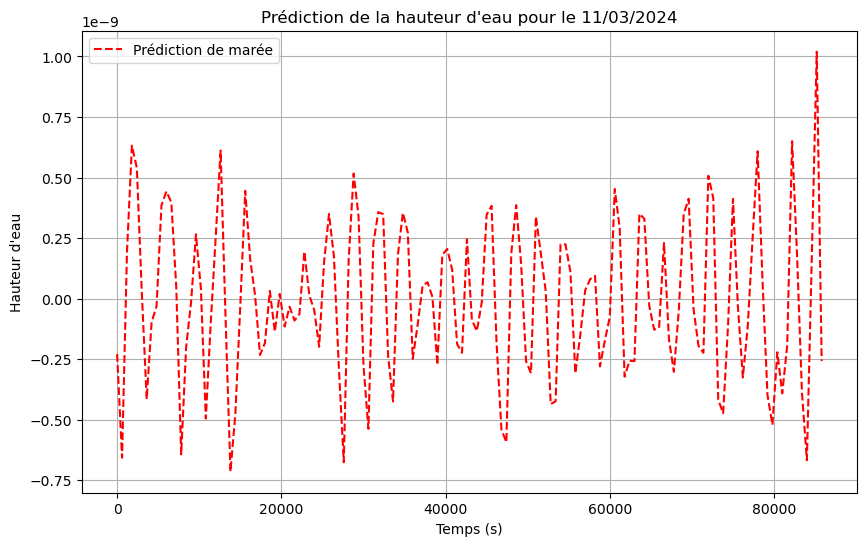

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
from datetime import datetime, timedelta

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne

# Fonction pour obtenir les données de marée spécifiques à une date donnée
def get_tidal_data(date):
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases



# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def tidal_model(t, Z, *parameters):
    result = Z
    for i in range(0, len(parameters), 3):
        Ac = parameters[i]
        Wc = 2 * np.pi * parameters[i + 1] / (3600 * 24)  # Conversion de la fréquence en radians par jour
        Lc = parameters[i + 2]
        result += Ac * np.cos(Wc * t - Lc)
    return result



# test pour la prediction 
prediction_date = datetime(2024, 3, 11)
# Obtenir les données de marée pour la date spécifiée
amplitudes, frequencies, phases = get_tidal_data(prediction_date)

# Générer les points temporels pour la prédiction
# Nous allons générer des points toutes les 10 minutes sur une journée
prediction_times = np.arange(0, 24 * 3600, 600)

# Initialiser les paramètres du modèle pour l'ajustement
initial_parameters = [Z] + [c for component in zip(amplitudes, frequencies, phases) for c in component]

real_tide_data = np.zeros_like(prediction_times)

# Ajuster le modèle aux données réelles
fitted_parameters, _ = curve_fit(tidal_model, prediction_times, real_tide_data, p0=initial_parameters)

# Faire la prédiction
predicted_tide = tidal_model(prediction_times, *fitted_parameters)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(prediction_times, predicted_tide, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau pour le ' + prediction_date.strftime('%d/%m/%Y'))
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Function to extract tidal constituent data from a CSV file
def extract_data_from_csv(csv_file):
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            frequency = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(frequency)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Define the tidal model based on harmonic constituents
def tidal_model(t, Z, *params):
    result = np.zeros_like(t) + Z
    num_components = len(params) // 3
    for i in range(num_components):
        amplitude = params[i * 3]
        frequency = params[i * 3 + 1]
        phase = params[i * 3 + 2]
        result += amplitude * np.cos(2 * np.pi * frequency * t + phase)
    return result

# Load tidal constituent data from a CSV file
csv_file = "hc.csv"
amplitudes, frequencies, phases = extract_data_from_csv(csv_file)

# Generate synthetic tide data for demonstration purposes
t = np.arange(0, 24, 0.1)  # 24 hours with a step of 0.1 hour
Z = 0  # Mean water level

# Generate synthetic tide data (for demonstration)
observed_tide = tidal_model(t, Z, *sum(zip(amplitudes, frequencies, phases), ()))
# Add some noise to simulate real-world conditions
observed_tide += np.random.normal(scale=0.1, size=len(t))

# Initial guess for parameters
initial_guess = [Z] + [c for constituent in zip(amplitudes, frequencies, phases) for c in constituent]

# Perform curve fitting to estimate parameters
optimized_params, _ = curve_fit(tidal_model, t, observed_tide, p0=initial_guess, maxfev=100000)


# Generate tide predictions
prediction_t = np.arange(0, 24.1, 0.1)  # Prediction for 24 hours
predicted_tide = tidal_model(prediction_t, *optimized_params)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, observed_tide, label='Observed Tide')
plt.plot(prediction_t, predicted_tide, label='Predicted Tide', linestyle='--', color='red')
plt.title('Tide Prediction Model')
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height')
plt.legend()
plt.grid(True)
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100000.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Function to extract tidal constituent data from a CSV file
def extract_data_from_csv(csv_file):
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            frequency = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(frequency)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Define the tidal model based on harmonic constituents
def tidal_model(t, Z, *params):
    result = np.zeros_like(t) + Z
    num_components = len(params) // 3
    for i in range(num_components):
        amplitude = params[i * 3]
        frequency = params[i * 3 + 1]
        phase = params[i * 3 + 2]
        result += amplitude * np.cos(2 * np.pi * frequency * t + phase)
    return result

# Load tidal constituent data from a CSV file
csv_file = "hc.csv"
amplitudes, frequencies, phases = extract_data_from_csv(csv_file)

# Generate synthetic tide data for demonstration purposes
t = np.arange(0, 24, 0.1)  # 24 hours with a step of 0.1 hour
Z = 0  # Mean water level

# Generate synthetic tide data (for demonstration)
observed_tide = tidal_model(t, Z, *sum(zip(amplitudes, frequencies, phases), ()))
# Add some noise to simulate real-world conditions
observed_tide += np.random.normal(scale=0.1, size=len(t))

# Initial guess for parameters
initial_guess = [Z] + [c for constituent in zip(amplitudes, frequencies, phases) for c in constituent]

# Perform curve fitting to estimate parameters
optimized_params, _ = curve_fit(tidal_model, t, observed_tide, p0=initial_guess, maxfev=100000)

# Load verified water level data for 2022 from a CSV file
verified_data_file = "2022.csv"
verified_water_levels = []

with open(verified_data_file, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        water_level = float(row['Verified (m)'])
        verified_water_levels.append(water_level)

# Select a specific day (e.g., January 1st, 2022)
day_index = 0  # Adjust this index according to the day you want to predict
# Time array for the selected day (24 hours)
t_day = np.arange(0, 24, 1)  # Hourly intervals
# Predict water level for the selected day
predicted_water_level = tidal_model(t_day, Z, *optimized_params)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t_day, verified_water_levels[day_index:day_index+24], label='Observed Water Level')
plt.plot(t_day, predicted_water_level, label='Predicted Water Level', linestyle='--', color='red')
plt.title('Water Level Prediction for January 1st, 2022')
plt.xlabel('Time (hours)')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 200000.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import os

class TidePredictionModel:
    def __init__(self):
        self.Z = 0.0  # Average water height
        self.temps = np.arange(0, 24, 0.1)  # Time from 0 to 10 seconds with a step of 0.01 second
        self.hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * self.temps) + 2 * np.sin(2 * np.pi * 2 * self.temps) + 0.5 * np.random.normal(size=len(self.temps))

    def extract_data_from_csv(self, csv_file):
        if not os.path.exists(csv_file):
            print(f"File {csv_file} does not exist.")
            return [], [], []

        amplitudes = []
        frequencies = []
        phases = []

        with open(csv_file, 'r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                amplitude = float(row.get('Amplitude', 0))
                phase = float(row.get('Phase', 0))
                speed = float(row.get('Speed', 0))

                amplitudes.append(amplitude)
                frequencies.append(speed)
                phases.append(phase)

        return amplitudes, frequencies, phases

    def modele_marée(self, t, Z, *parametres):
        resultat = Z
        for i in range(0, len(parametres), 3):
            Ac = parametres[i]
            Wc = 2*3.14*(parametres[i + 1])/360
            Lc = parametres[i + 2]
            resultat += Ac * np.cos(Wc * (t/3600) - Lc)
        return resultat

    def predict_tide(self, csv_file):
        amplitudes, frequencies, phases = self.extract_data_from_csv(csv_file)

        print("Amplitudes:", amplitudes)
        print("Frequencies:", frequencies)
        print("Phases:", phases)

        # Use a subset of data for parameter estimation
        subset_temps = self.temps[:120]
        subset_hauteur_eau = self.hauteur_eau[:120]

        parametres_initiaux = [self.Z] + [c for composante in zip(amplitudes, frequencies, phases) for c in composante]
        parametres_optimaux, _ = curve_fit(self.modele_marée, subset_temps, subset_hauteur_eau, p0=parametres_initiaux, maxfev=1000000)

        temps_prediction = np.arange(0, 24, 0.1)
        hauteur_eau_predite = self.modele_marée(temps_prediction, *parametres_optimaux)

        plt.figure(figsize=(10, 6))
        plt.plot(self.temps, self.hauteur_eau, label='Real Data')
        plt.plot(temps_prediction, hauteur_eau_predite, label='Tide Prediction', linestyle='--', color='red')
        plt.title('Prediction of water height with the first 10 tide constituents')
        plt.xlabel('Time (s)')
        plt.ylabel('Water Height')
        plt.legend()
        plt.show()

# Usage
model = TidePredictionModel()
model.predict_tide("../Data/hc.csv")


Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


# plusieurs fois ca donne des erreurs avec maxfev=.....

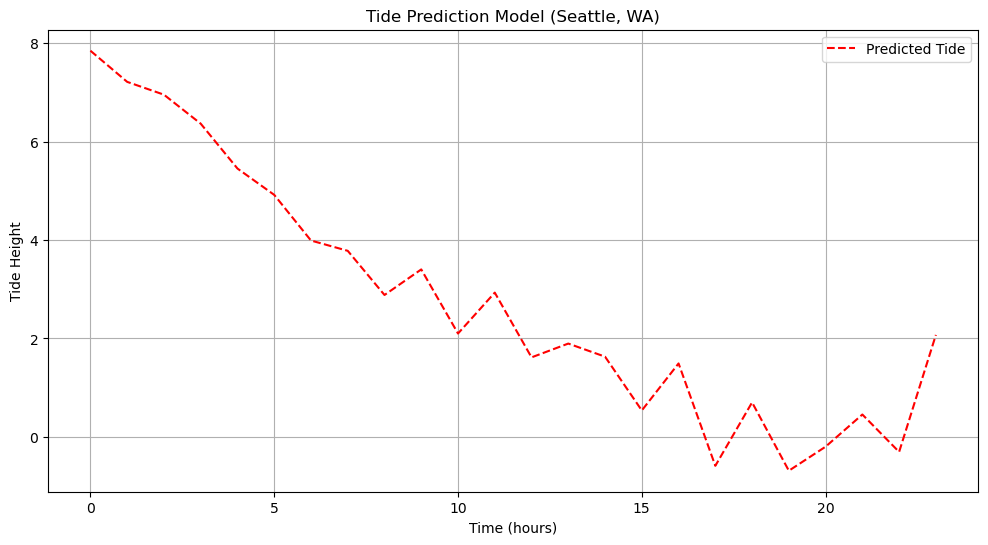

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Function to extract tidal constituent data from a CSV file
def extract_data_from_csv(csv_file):
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            frequency = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(frequency)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Define the tidal model based on harmonic constituents
def tidal_model(t, Z, *params):
    result = np.zeros_like(t) + Z
    num_components = len(params) // 3
    for i in range(num_components):
        amplitude = params[i * 3]
        frequency = params[i * 3 + 1]
        phase = params[i * 3 + 2]
        result += amplitude * np.cos(2 * np.pi * frequency * t + phase)
    return result

# Load tidal constituent data from a CSV file
csv_file = "hc.csv"
amplitudes, frequencies, phases = extract_data_from_csv(csv_file)

# Generate synthetic tide data for demonstration purposes
t = np.arange(0, 24, 0.1)  # 24 hours with a step of 0.1 hour
Z = 0  # Mean water level

# Generate synthetic tide data (for demonstration)
observed_tide = tidal_model(t, Z, *sum(zip(amplitudes, frequencies, phases), ()))
# Add some noise to simulate real-world conditions
observed_tide += np.random.normal(scale=0.1, size=len(t))

# Initial guess for parameters
initial_guess = [Z] + [c for constituent in zip(amplitudes, frequencies, phases) for c in constituent]

# Perform curve fitting to estimate parameters
optimized_params, _ = curve_fit(tidal_model, t, observed_tide, p0=initial_guess, maxfev=100000)

# Generate tide predictions for 24 hours with a step of 1 hour
predicted_tide_hours = np.arange(0, 24, 1)  # Prediction for 24 hours with a step of 1 hour
predicted_tide = tidal_model(predicted_tide_hours, *optimized_params)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predicted_tide_hours, predicted_tide, label='Predicted Tide', linestyle='--', color='red')
plt.title('Tide Prediction Model (Seattle, WA)')
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height')
plt.legend()
plt.grid(True)
plt.show()


# Modele Actuel avec Classe , (a developper)

Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


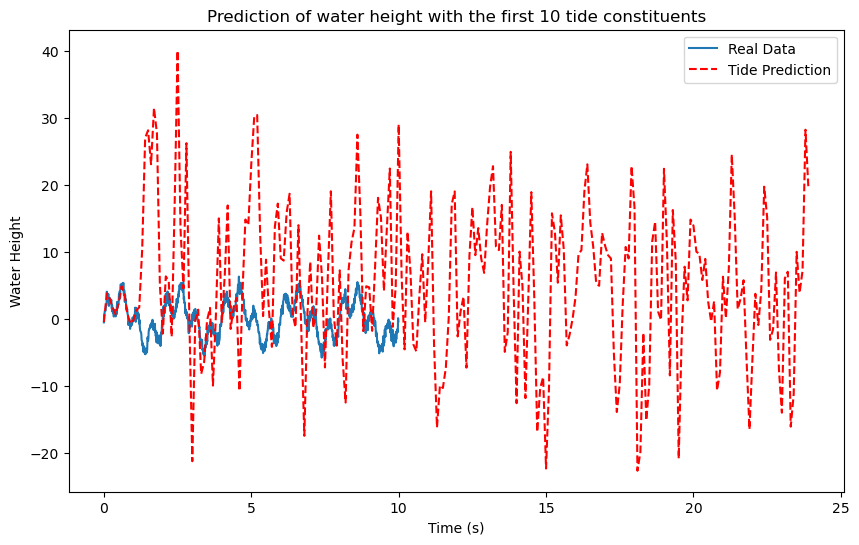

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import os

class TidePredictionModel:
    def __init__(self):
        self.Z = 0.0  # Average water height
        self.temps = np.arange(0, 10, 0.01)  # Time from 0 to 10 seconds with a step of 0.01 second
        self.hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * self.temps) + 2 * np.sin(2 * np.pi * 2 * self.temps) + 0.5 * np.random.normal(size=len(self.temps))

    def extract_data_from_csv(self, csv_file):
        if not os.path.exists(csv_file):
            print(f"File {csv_file} does not exist.")
            return [], [], []

        amplitudes = []
        frequencies = []
        phases = []

        with open(csv_file, 'r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                amplitude = float(row.get('Amplitude', 0))
                phase = float(row.get('Phase', 0))
                speed = float(row.get('Speed', 0))

                amplitudes.append(amplitude)
                frequencies.append(speed)
                phases.append(phase)

        return amplitudes, frequencies, phases

    def modele_marée(self, t, Z, *parametres):
        resultat = Z
        n = 0
        for i in range(0, len(parametres), 3):
            Ac = parametres[i]
            Wc = 2*3.14*(parametres[i + 1])/360
            Lc = parametres[i + 2]
            resultat += Ac * np.cos(Wc * (t/3600) - Lc)
            n += 1
        return resultat

    def predict_tide(self, csv_file):
        amplitudes, frequencies, phases = self.extract_data_from_csv(csv_file)

        print("Amplitudes:", amplitudes)
        print("Frequencies:", frequencies)
        print("Phases:", phases)

        # Use a subset of data for parameter estimation
        
        subset_temps = self.temps[:120]
        subset_hauteur_eau = self.hauteur_eau[:120]

        # Initial guess for parameters
        parametres_initiaux = [self.Z] + [c for composante in zip(amplitudes, frequencies, phases) for c in composante]

        # Optimize parameters using curve_fit
        parametres_optimaux, _ = curve_fit(self.modele_marée, subset_temps, subset_hauteur_eau, p0=parametres_initiaux, maxfev=1000000)

        temps_prediction = np.arange(0, 24, 0.1)
        hauteur_eau_predite = self.modele_marée(temps_prediction, *parametres_optimaux)

        # Plot results
        plt.figure(figsize=(10, 6))
        plt.plot(self.temps, self.hauteur_eau, label='Real Data')
        plt.plot(temps_prediction, hauteur_eau_predite, label='Tide Prediction', linestyle='--', color='red')
        plt.title('Prediction of water height with the first 10 tide constituents')
        plt.xlabel('Time (s)')
        plt.ylabel('Water Height')
        plt.legend()
        plt.show()

# Usage
model = TidePredictionModel()
model.predict_tide("../Data/hc.csv")